## step1:import related dependencies(libraries)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## step2 : loading the data using pandas

#### we can get data from any govt orgs or internet or ngos...etc

In [2]:
df = pd.read_excel('pima-data (1).xlsx')
df

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,1.3790,True,True
1,1,85,66,29,0,26.6,0.351,31,0,1.1426,False,False
2,8,183,64,0,0,23.3,0.672,32,1,0.0000,True,True
3,1,89,66,23,94,28.1,0.167,21,0,0.9062,False,False
4,0,137,40,35,168,43.1,2.288,33,1,1.3790,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1.8912,False,False
764,2,122,70,27,0,36.8,0.340,27,0,1.0638,False,False
765,5,121,72,23,112,26.2,0.245,30,0,0.9062,False,False
766,1,126,60,0,0,30.1,0.349,47,1,0.0000,True,True


## step3: cleaning the data

#### a . checking the null values present in a dataframe

In [3]:
df.isnull().sum()
# has_diabetes    0 if o means we dont have any null values in a df

num_preg         0
glucose_conc     0
diastolic_bp     0
thickness        0
insulin          0
bmi              0
diab_pred        0
age              0
diabetes_orig    0
skin             0
has_diabetes     0
diabetes         0
dtype: int64

In [ ]:
## if null values are presemt then we have to use dropna or fillna
## if you have more data then use dropna otherwise fillna

### b . finding the corelation between two columns

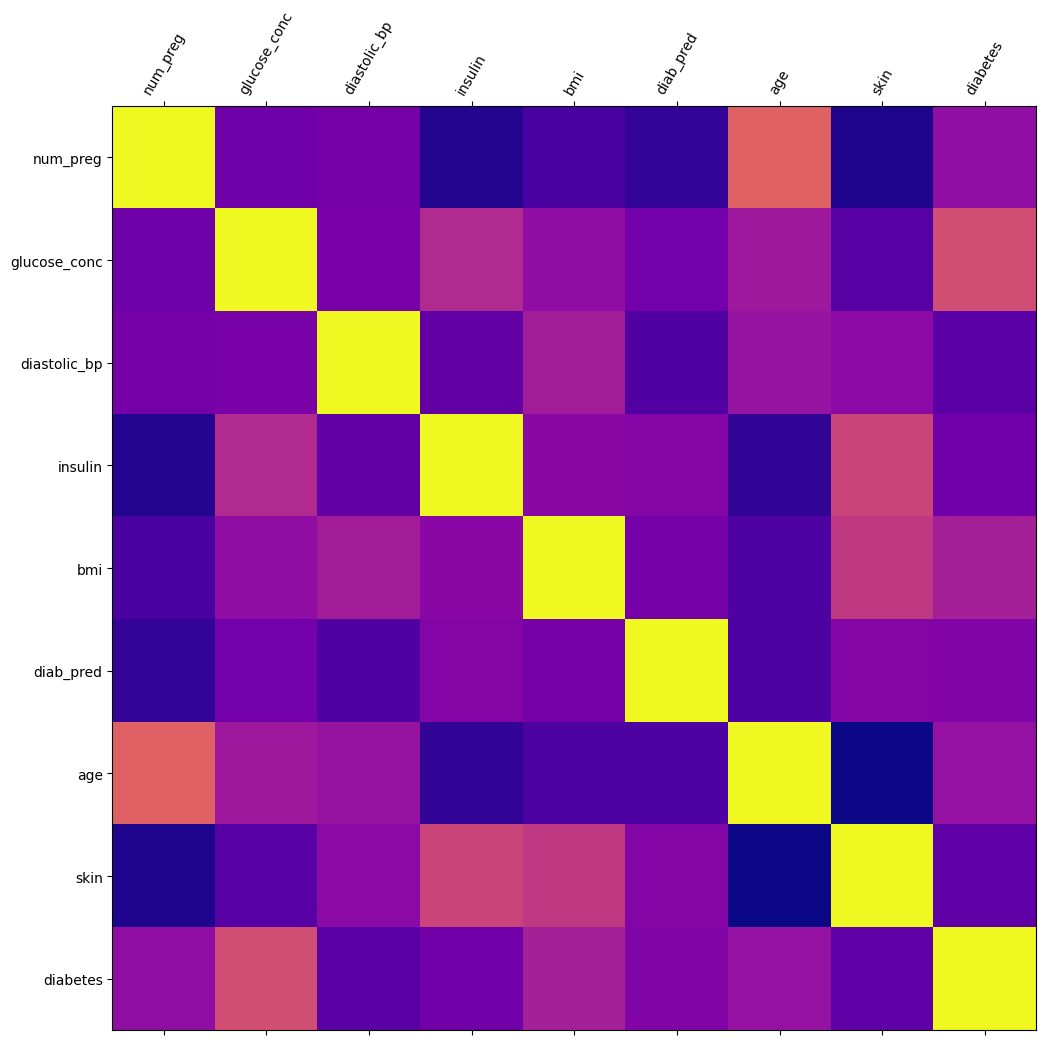

In [35]:
corr = df.corr()
fig,ax= plt.subplots(figsize=(12,12))
cmap = 'plasma'
ax.matshow(corr,cmap=cmap)
plt.xticks(range(len(corr.columns)),corr.columns,rotation=60)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.show()

In [36]:
df.drop('thickness',axis=1,inplace=True)
df.drop('has_diabetes',axis=1,inplace=True)
df.drop('diabetes_orig',axis=1,inplace=True)

KeyError: "['thickness'] not found in axis"

In [ ]:
df.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True


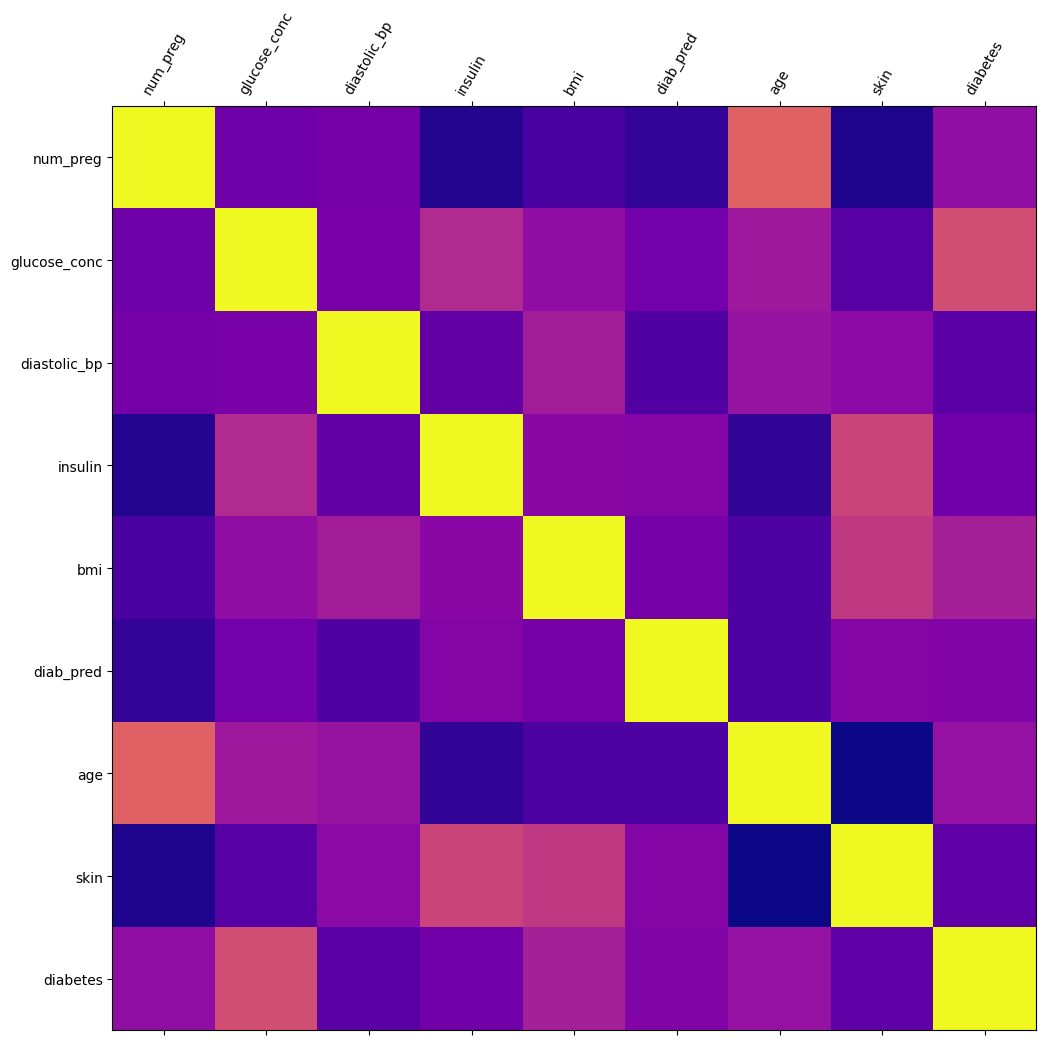

In [ ]:
corr = df.corr()
fig,ax= plt.subplots(figsize=(12,12))
cmap = 'plasma'
ax.matshow(corr,cmap=cmap)
plt.xticks(range(len(corr.columns)),corr.columns,rotation=60)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.show()


### d. replacing the string data

In [8]:
df.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True


In [9]:
# Creating a dictionary to convert True to 1 and False to 0
# Want to replace True and false in diabetes columns
dict1 = {
'diabetes':[True,False]
}

# Inplace of True place with 1 and in place of False place with 0
dict2 = {
'diabetes':[1,0]
}

df.replace(dict1,dict2,inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13584\477310864.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(dict1,dict2,inplace=True)


In [10]:
df.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,23.3,0.672,32,0.0000,1
3,1,89,66,94,28.1,0.167,21,0.9062,0
4,0,137,40,168,43.1,2.288,33,1.3790,1


### checking the propertion

In [11]:
num_true = len(df.loc[df['diabetes']==1])
num_false = len(df.loc[df['diabetes'] == 0])
print(f'num_true = {num_true}')
print(f'num_false = {num_false}')
per_num_true = (num_true / (num_true+num_false))*100
print(per_num_true)
per_num_false = (num_false/(num_false+num_true))*100
print(per_num_false)

num_true = 268
num_false = 500
34.89583333333333
65.10416666666666


### if we observer 65:35 is a good percentage

In [ ]:
# step4 train test split

In [12]:
from sklearn.model_selection import train_test_split
input_columns = ['num_preg','glucose_conc','diastolic_bp','insulin','bmi','diab_pred','age','skin']
output_columns = ['diabetes']
x = df[input_columns].values
y = df[output_columns].values
spilt_test_size = 0.3
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = spilt_test_size,random_state=42)

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(537, 8)
(537, 1)
(231, 8)
(231, 1)


### verify the propertion percentage

In [14]:
print('{0:0.2f}% in training set'.format((len(x_train)/len(df.index))*100))
print('{0:0.2f}% in training set'.format((len(x_test)/len(df.index))*100))

69.92% in training set
30.08% in training set


### checking True and False percentages for training and esting

In [15]:
print('training true:{0} ({1:0.2f}%)'.format(len(y_train[y_train[ : ] == 1]),len(y_train[y_train[ : ] ==
1])/len(y_train) * 100))

print('training False:{0} ({1:0.2f}%)'.format(len(y_train[y_train[ : ] == 0]),len(y_train[y_train[ : ] ==
0])/len(y_train) * 100))

print('Test true:{0} ({1:0.2f}%)'.format(len(y_test[y_test[ : ] == 1]),len(y_test[y_test[ : ] ==
1])/len(y_train) * 100))

print('Test false:{0} ({1:0.2f}%)'.format(len(y_test[y_test[ : ] == 0]),len(y_test[y_test[ : ] ==
0])/len(y_train) * 100))

training true:188 (35.01%)
training False:349 (64.99%)
Test true:80 (14.90%)
Test false:151 (28.12%)


x = 10 y = 20 print("first is {0} and second is {1}".format(x,y))

In [16]:
df.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,23.3,0.672,32,0.0000,1
3,1,89,66,94,28.1,0.167,21,0.9062,0
4,0,137,40,168,43.1,2.288,33,1.3790,1


In [17]:
# counting no of zeros in the data

total_num_preg = len(df.loc[df['num_preg']== 0])
print(f'number of Rows missing in num_preg column is {total_num_preg}')

total_glucose_conc = len(df.loc[df['glucose_conc']==0])
print(f'number of Rows missing in glucose_conc column is {total_glucose_conc}')
total_diastolic_bp = len(df.loc[df['diastolic_bp']==0])
print(f'number of Rows missing in diastolic_bp column is {total_diastolic_bp}')
total_insulin = len(df.loc[df['insulin']==0])
print(f'number of Rows missing in insulin column is {total_insulin}')
total_bmi = len(df.loc[df['bmi']==0])
print(f'number of Rows missing in bmi column is {total_bmi}')
total_diab_pred = len(df.loc[df['diab_pred']==0])
print(f'number of Rows missing in diab_pred column is {total_diab_pred}')
total_age = len(df.loc[df['age'] ==0])
print(f'number of rows missing in age is {total_age}')

number of Rows missing in num_preg column is 111
number of Rows missing in glucose_conc column is 5
number of Rows missing in diastolic_bp column is 35
number of Rows missing in insulin column is 374
number of Rows missing in bmi column is 11
number of Rows missing in diab_pred column is 0
number of rows missing in age is 0


In [18]:
# replace 0 values with mean value by using simple imputer

from sklearn.impute import SimpleImputer
fill_zeros = SimpleImputer(missing_values=0,strategy='mean')
x_train = fill_zeros.fit_transform(x_train)
x_test = fill_zeros.fit_transform(x_test)

In [19]:
x_train[:5]

array([[1.00000000e+00, 9.50000000e+01, 6.00000000e+01, 5.80000000e+01,
        2.39000000e+01, 2.60000000e-01, 2.20000000e+01, 7.09200000e-01],
       [5.00000000e+00, 1.05000000e+02, 7.20000000e+01, 3.25000000e+02,
        3.69000000e+01, 1.59000000e-01, 2.80000000e+01, 1.14260000e+00],
       [4.34056399e+00, 1.35000000e+02, 6.80000000e+01, 2.50000000e+02,
        4.23000000e+01, 3.65000000e-01, 2.40000000e+01, 1.65480000e+00],
       [4.00000000e+00, 1.31000000e+02, 6.80000000e+01, 1.66000000e+02,
        3.31000000e+01, 1.60000000e-01, 2.80000000e+01, 8.27400000e-01],
       [1.00000000e+00, 1.03000000e+02, 3.00000000e+01, 8.30000000e+01,
        4.33000000e+01, 1.83000000e-01, 3.30000000e+01, 1.49720000e+00]])

## step4: Training the model

In [20]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB() #creating object for GaussianNB Class
nb_model.fit(x_train,y_train.ravel()) # Training a model

,priors,None
,var_smoothing,1e-09


In [21]:
from sklearn import metrics
nb_predict_model = nb_model.predict(x_train) # Testing a model
print(f'Predicted accuracy { metrics.accuracy_score(y_train,nb_predict_model) }') # Accuracy

Predicted accuracy 0.7541899441340782


In [22]:
from sklearn import metrics
nb_predict_test = nb_model.predict(x_test)
print(f'Predicted accuracy { metrics.accuracy_score(y_test,nb_predict_test) }')

Predicted accuracy 0.7359307359307359


In [23]:
print(f'{ metrics.confusion_matrix(y_test,nb_predict_test)}')

[[118  33]
 [ 28  52]]


In [24]:
print(f'{ metrics.classification_report(y_test,nb_predict_test)}')

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



In [ ]:
# Random Forest algorithem

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42) # creating object for
# RandomForestClassifier class
rf_model.fit(x_train,y_train.ravel()) # Training a machine

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
from sklearn import metrics
rf_predict_model = rf_model.predict(x_train) # Testing a model
print(f'Predicted accuracy { metrics.accuracy_score(y_train,rf_predict_model) }')

Predicted accuracy 1.0


In [27]:
from sklearn import metrics
rf_predict_test =rf_model.predict(x_test)
print(f'Predicted accuracy { metrics.accuracy_score(y_test,rf_predict_test) }')

Predicted accuracy 0.7532467532467533


In [28]:
print(f'{ metrics.confusion_matrix(y_test,rf_predict_test)}')

[[120  31]
 [ 26  54]]


In [ ]:
print(f'{ metrics.classification_report(y_test,rf_predict_test)}')

In [ ]:
# Knearest algorithem

In [29]:
from sklearn.neighbors import KNeighborsClassifier
k_neighbor = KNeighborsClassifier()
k_neighbor.fit(x_train,y_train.ravel())

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [30]:
x_pred = k_neighbor.predict(x_test)
print(f'Accuracy = {metrics.accuracy_score(y_test,x_pred)}')
print(f'Confusion matrix = \n {metrics.confusion_matrix(y_test,x_pred)}')

Accuracy = 0.7359307359307359
Confusion matrix = 
 [[119  32]
 [ 29  51]]


In [ ]:
print(f'{ metrics.classification_report(y_test,x_pred)}')

In [ ]:
## conclusion: we had trained my model using naivebaies ,random forest and  k neighbers classication
##  comparing those 3 algorithems random is giving good accuray and performace report
## so we are choosing random forest algorithem for my model

In [31]:
from sklearn.svm import SVC
support = SVC()
support.fit(x_train,y_train)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [32]:
x_pred = support.predict(x_test)
print(f'Accuracy = {metrics.accuracy_score(y_test,x_pred)} ')
print(f'Confusion matrix = \n {metrics.confusion_matrix(y_test,x_pred)}')

Accuracy = 0.7402597402597403 
Confusion matrix = 
 [[133  18]
 [ 42  38]]


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
standardized_data = scaler.transform(x)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.46849198  1.4259954
   0.90726993]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.36506078 -0.19067191
   0.53090156]
 [ 1.23388019  1.94372388 -0.26394125 ...  0.60439732 -0.10558415
  -1.28821221]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.68519336 -0.27575966
   0.15453319]
 [-0.84488505  0.1597866  -0.47073225 ... -0.37110101  1.17073215
  -1.28821221]
 [-0.84488505 -0.8730192   0.04624525 ... -0.47378505 -0.87137393
   0.65635768]]


In [34]:
support_model_test = support.predict(x_test) # Testing a model

input_data = [8,183,64,0,23.3,0.672,32,0.0000]
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
print(std_data)
support_model_test = support.predict(std_data)
print(support_model_test)

[[ 1.23388019  1.94372388 -0.26394125 -0.69289057 -1.10325546  0.60439732
  -0.10558415 -1.28821221]]
[0]
